In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [62]:
earthquake = pd.read_csv('earthquake.txt', sep=' ')
earthquake.head()

,popn,body,surface
0,equake,5.60,4.25
1,equake,5.18,3.93
2,equake,6.31,6.30
3,equake,5.36,4.49
4,equake,5.96,6.39


## Scatter plot

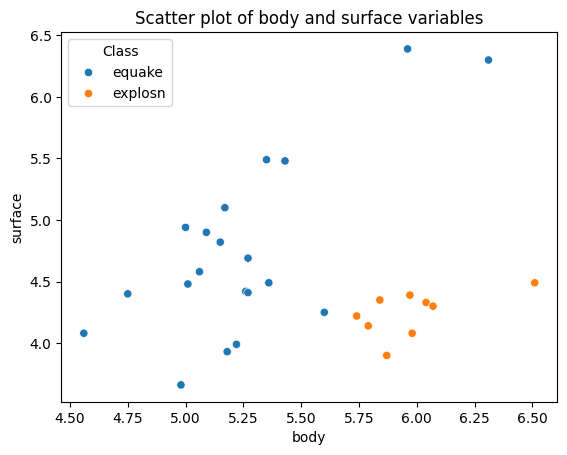

In [63]:
sns.scatterplot(x='body', y='surface', hue='popn', data=earthquake)
plt.title('Scatter plot of body and surface variables')
plt.legend(title='Class')

## Fitting a logistic regression model without regularization

In [64]:
log_reg = LogisticRegression(penalty=None)
log_reg.fit(earthquake[['body', 'surface']], earthquake['popn'])

LogisticRegression(penalty=None)

### Printing coefficients

In [65]:
log_reg.coef_

array([[ 111.91608035, -117.54515973]])

In [66]:
log_reg.intercept_

array([-135.04765908])

### Printing probabilities

In [67]:
log_reg.predict_proba(earthquake[['body', 'surface']])

array([[9.99623621e-01, 3.76378816e-04],
       [9.99999969e-01, 3.14508242e-08],
       [1.00000000e+00, 2.71719066e-74],
       [1.00000000e+00, 4.55919924e-28],
       [1.00000000e+00, 6.73136570e-96],
       [1.00000000e+00, 2.35439841e-29],
       [1.00000000e+00, 1.92311838e-68],
       [1.00000000e+00, 4.02300724e-53],
       [1.00000000e+00, 1.32931825e-79],
       [1.00000000e+00, 1.43811319e-44],
       [1.00000000e+00, 2.33570214e-28],
       [1.00000000e+00, 1.18751053e-42],
       [9.99637043e-01, 3.62956858e-04],
       [9.99999998e-01, 2.39254786e-09],
       [1.00000000e+00, 3.04157444e-47],
       [1.00000000e+00, 4.03167927e-62],
       [1.00000000e+00, 4.03362280e-55],
       [1.00000000e+00, 5.07501707e-46],
       [1.00000000e+00, 1.54564287e-68],
       [1.00000000e+00, 3.33030492e-75],
       [1.33226763e-14, 1.00000000e+00],
       [3.86743434e-08, 9.99999961e-01],
       [7.30679033e-04, 9.99269321e-01],
       [3.74922315e-12, 1.00000000e+00],
       [0.000000

### Computing the log-likelihood function

In [68]:
labels = earthquake['popn'].to_numpy()
labels = np.where(labels == 'equake', 0, 1)

In [69]:
p = log_reg.predict_proba(earthquake[['body', 'surface']])[:, 1]
log_likelihood = np.log(np.prod(p ** labels * (1 - p) ** (1 - labels)))
log_likelihood.item()

-0.0014827399403033647

## Fitting a logistic regression model with L2-regularization

In [70]:
log_reg_l2 = LogisticRegression(penalty='l2')
log_reg_l2.fit(earthquake[['body', 'surface']], earthquake['popn'])

LogisticRegression()

### Printing coefficients

In [71]:
log_reg_l2.coef_

array([[ 2.16922885, -1.18171354]])

In [72]:
log_reg_l2.intercept_

array([-7.46937734])

### Printing probabilities

In [73]:
log_reg_l2.predict_proba(earthquake[['body', 'surface']])

array([[0.58515658, 0.41484342],
       [0.70618068, 0.29381932],
       [0.7731771 , 0.2268229 ],
       [0.75918281, 0.24081719],
       [0.89011564, 0.10988436],
       [0.78285929, 0.21714071],
       [0.90730829, 0.09269171],
       [0.91412542, 0.08587458],
       [0.91306214, 0.08693786],
       [0.8693947 , 0.1306053 ],
       [0.77710904, 0.22289096],
       [0.82917305, 0.17082695],
       [0.72942144, 0.27057856],
       [0.70287784, 0.29712216],
       [0.87049329, 0.12950671],
       [0.90188961, 0.09811039],
       [0.88013487, 0.11986513],
       [0.9167575 , 0.0832425 ],
       [0.92135475, 0.07864525],
       [0.89717799, 0.10282201],
       [0.37380085, 0.62619915],
       [0.4272215 , 0.5727785 ],
       [0.48538785, 0.51461215],
       [0.45062057, 0.54937943],
       [0.34179322, 0.65820678],
       [0.20645813, 0.79354187],
       [0.50120871, 0.49879129],
       [0.33598908, 0.66401092],
       [0.35058391, 0.64941609]])

### Computing the log-likelihood function

In [74]:
p = log_reg_l2.predict_proba(earthquake[['body', 'surface']])[:, 1]
log_likelihood = np.log(np.prod(p ** labels * (1 - p) ** (1 - labels)))
log_likelihood.item()

-8.425076253244162